In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in the data 

In [3]:
items = pd.read_csv('data.csv')

In [14]:
print(items.shape)
items.head()

(705857, 9)


,store_number,item_number,date,number_of_item_on_file,cant_find_times_this_month,weekly_sales,item_category,store_type,in_store_flag
0,1911,9224620,2020-11-24,28,2,40.791665,BAG PASTA,SC,True
1,148,563046559,2020-11-12,7,1,0.458333,BAKING MIXES,SC,False
2,1052,555089121,2020-11-12,11,1,10.633334,COLD CEREAL,SC,True
3,3317,565914006,2020-11-18,16,5,23.283333,SUGAR,SC,True
4,2465,563007859,2020-11-19,14,2,4.216667,BAKING MIXES,SC,True


In [22]:
#column types
items.dtypes

store_number                    int64
item_number                     int64
date                           object
number_of_item_on_file          int64
cant_find_times_this_month      int64
weekly_sales                  float64
item_category                  object
store_type                     object
in_store_flag                    bool
dtype: object

In [23]:
#unique values per column
items.nunique()

store_number                   4229
item_number                   17182
date                             29
number_of_item_on_file         1169
cant_find_times_this_month       26
weekly_sales                   2898
item_category                    68
store_type                        2
in_store_flag                     2
dtype: int64

In [30]:
#Looking for missing data
items.isnull().sum()

store_number                    0
item_number                     0
date                            0
number_of_item_on_file          0
cant_find_times_this_month      0
weekly_sales                  126
item_category                 470
store_type                      0
in_store_flag                   0
dtype: int64

In [ ]:
#126 missing weekly sales, 470 missing item_category

In [ ]:
#exploring missing weekly sales

In [46]:
missing_sales = items[items['weekly_sales'].isnull()]

In [49]:
print(missing_sales.shape) #126 rows
print(missing_sales.nunique()) #only 1 item category

(126, 9)
store_number                  123
item_number                   102
date                           24
number_of_item_on_file         39
cant_find_times_this_month      5
weekly_sales                    0
item_category                   1
store_type                      2
in_store_flag                   2
dtype: int64


In [50]:
missing_sales.head() #baking mixes

,store_number,item_number,date,number_of_item_on_file,cant_find_times_this_month,weekly_sales,item_category,store_type,in_store_flag
13788,1181,550431572,2020-11-27,14,3,NaN,BAKING MIXES,SC,True
17640,1959,567146575,2020-11-05,7,1,NaN,BAKING MIXES,SC,True
33086,651,573175295,2020-11-05,12,1,NaN,BAKING MIXES,SC,False
36101,1057,563008158,2020-11-22,2,1,NaN,BAKING MIXES,SC,True
42023,3591,563008129,2020-11-05,34,1,NaN,BAKING MIXES,SC,True


In [63]:
#avg of baking mixes weekly sales
baking = items[items['item_category']=='BAKING MIXES']
baking['weekly_sales'].mean()

6.492959966774902

In [66]:
baking.describe()

,store_number,item_number,number_of_item_on_file,cant_find_times_this_month,weekly_sales
count,32891.000000,3.289100e+04,32891.000000,32891.000000,32765.000000
mean,2702.520781,4.287716e+08,14.520021,1.550455,6.492960
std,1832.267577,2.379665e+08,26.325831,1.063148,10.440261
min,21.000000,9.204290e+06,1.000000,0.000000,-0.183333
25%,1196.000000,5.502136e+08,4.000000,1.000000,1.100000
50%,2342.000000,5.630079e+08,8.000000,1.000000,2.841667
75%,4077.000000,5.660463e+08,15.000000,2.000000,7.883333
max,8978.000000,5.769039e+08,1188.000000,26.000000,256.575000


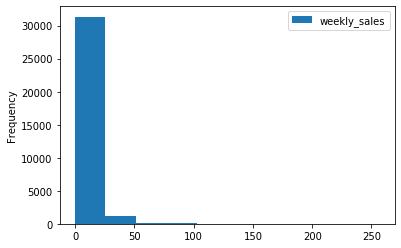

In [64]:
#lets look at histogram of these sales
baking.plot(y='weekly_sales',kind='hist')